# Case 4: Estimate model parameters using Maximum Likelihood Estimation

In [1]:
using BOMBs

### Just to print the nice BOMBS logo


In [2]:
printLogo()


                      ___________   __________   ___  ___   ___________   __________
                     /  _____   /  / ______  /  /   \/   \  \   _____  \  \  _______\
                    /  /____/  /  / /     / /  /          \  \  \____\  \  \ \________
                   /  _____   /  / /     / /  /            \  \   _____  \  \________ \
                  /  /    /  /  / /     / /  /   /\____/\   \  \  \    \  \          \ \
                 /  /____/  /  / /_____/ /  /   /        \   \  \  \____\  \   _______\ \
                /__________/  /_________/  /__ /          \___\  \__________\  \_________\

                


First we need to generate the model (the package will not do it automatically)


In [3]:
# Generate the empty dictionary with the model_def structure
model_def = defModStruct()

# Fill the different elements of the dictionary with your model specifications. See above how ^
model_def["NameF"] = ["PLacExample"];
model_def["nStat"] = [4];
model_def["nPar"] = [9];
model_def["nInp"] = [1];
model_def["stName"] = ["Cit_mrna","Cit_foldedP","Cit_fluo","Cit_AU"];

model_def["inpName"] = ["IPTG"];

model_def["parName"] = ["alpha1","Vm1","h1","Km1","d1",
                            "alpha2","d2","Kf","sc_molec"];
model_def["eqns"] = ["dCit_mrna=alpha1+Vm1*(IPTG^h1/(Km1^h1+IPTG^h1))-d1*Cit_mrna",
                    "dCit_foldedP=alpha2*Cit_mrna-(d2+Kf)*Cit_foldedP",
                    "dCit_fluo=Kf*Cit_foldedP-d2*Cit_fluo",
                    "dCit_AU = sc_molec*dCit_fluo"];

model_def["Y0eqs"] = ["Cit_mrna = (alpha1 + Vm1*(IPTG^h1/(Km1^h1+IPTG^h1)))/d1;",
                      "Cit_foldedP = (alpha2*Cit_mrna)/(Kf+d2);",
                      "Cit_fluo = (Kf*Cit_foldedP)/d2;",
                      "Cit_AU= sc_molec*Cit_fluo;"]; 

model_def["Y0Sim"] = [];
model_def["tols"] = [1e-9, 1e-9];

# Generate the scripts with the ODEs and the step-wise implementation
model_def = GenerateModel(model_def);


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------------------------------------



### This function gives you information about the structure necessary to generate the model and how to call it. 
If you do not know how to call a specific section, just call the function with no input (infoAll()) to get the information.

In [4]:
infoAll("mle")



                CALL defMLEStruct()

mle_def["Nexp"] = [];
        # Integer indicating the number of experiments to be simulated

mle_def["finalTime"] = [];
        # Vector of final times for each simulation (initial time will always be assumed as 0,
        # so please consider that).

mle_def["switchT"] = [];
        # Array with the switching times of the inducer in the simulation (time 0 and final
        # time need to be considered)

mle_def["y0"] = [];
        # Array (single simulation) of Y0s for the simulations for the
        # experiment. If you are computing the steady-state this vector might not be used, however, you
        # still need to introduce it with some random numbers.

mle_def["preInd"] = [];
        # Vector of numbers with the values for the stimuli (inducer) in the over-night. It might be the case
        # that this entry is not required since only the y0 vector is considered for the initial point of
        # the simulation. However, you still need to 

# MLE Example 1
This example estimates the parameters of our model 3 times in series (one after the other)

In [5]:
mle_def = defMLEStruct()

Dict{Any,Any} with 19 entries:
  "thetaMIN"     => Any[]
  "parallel"     => Any[]
  "DataError"    => Any[]
  "OPTsolver"    => Any[]
  "Nexp"         => Any[]
  "MaxTime"      => Any[]
  "y0"           => Any[]
  "uInd"         => Any[]
  "thetaMAX"     => Any[]
  "Obs"          => Any[]
  "switchT"      => Any[]
  "preInd"       => Any[]
  "finalTime"    => Any[]
  "MaxFuncEvals" => Any[]
  "tsamps"       => Any[]
  "flag"         => Any[]
  "plot"         => Any[]
  "DataMean"     => Any[]
  "runs"         => Any[]

If you already have a simul_def file generated you can use the function SimToMle to extract the relevant contents


In [6]:
simul_def = defSimulStruct()
simul_def["Nexp"] = [2]; 
simul_def["finalTime"] = [1439, 1439]; 
simul_def["switchT"] = [[0, 500, 1000, 1439],[0, 1439]]; 
simul_def["y0"] = [[10,10,10,10],[10,10,10,10]]; 
simul_def["preInd"] = [[0],[0]]; 
simul_def["uInd"] = [Array([5, 100, 1]'),Array([7.5]')]; 
simul_def["theta"] = [0.000377125304442752*60, 0.00738924359598526*60, 1.53333782244337, 5.01927275636639,
    0.00118831480244382*60, 0.0461264539194078*60, 0.000475563708997018*60, 0.000301803966012407*60, 68.8669567134881]; # Could be the directory and file name of a csv.
simul_def["tsamps"] = [collect(0:5:1439),collect(0:10:1439)];
simul_def["plot"] = [true];
simul_def["flag"] = ["Example1"];
mle_def = SimToMle(mle_def, simul_def)

Dict{Any,Any} with 19 entries:
  "thetaMIN"     => Any[]
  "parallel"     => Any[]
  "DataError"    => Any[]
  "OPTsolver"    => Any[]
  "Nexp"         => [2]
  "MaxTime"      => Any[]
  "y0"           => [[10, 10, 10, 10], [10, 10, 10, 10]]
  "uInd"         => [Array([5.0, 100.0, 1.0]'), Array([7.5]')]
  "thetaMAX"     => Any[]
  "Obs"          => Any[]
  "switchT"      => [[0, 500, 1000, 1439], [0, 1439]]
  "preInd"       => [[0], [0]]
  "finalTime"    => [1439, 1439]
  "MaxFuncEvals" => Any[]
  "tsamps"       => [[0, 5, 10, 15, 20, 25, 30, 35, 40, 45  …  1390, 1395, 1400…
  "flag"         => ["Example1"]
  "plot"         => Bool[1]
  "DataMean"     => Any[]
  "runs"         => Any[]

And now you can fill the rest of the fields: 


In [7]:
mle_def["thetaMAX"] = [0.4950,0.4950,4.9,10,0.23,6.8067,0.2449,0.0217,10]; 
mle_def["thetaMIN"] = [3.88e-5,3.88e-2,0.5,2,7.7e-3,0.2433,5.98e-5,0.012,0.001]; 
mle_def["runs"] = [3]; 
mle_def["parallel"] = []; 

# For the two following fields, you can introduce a string pointing to the observable files (same strings in)
#     both fields having the same structure as the ones generated in the PseudoData section. If multiple theta are
#     considered in the file, then the covariance matrix will be taken. 
mle_def["DataMean"] = ["PseudoDataFiles\\TestPLac_EXP1_Example1b_Observables.csv", "PseudoDataFiles\\TestPLac_EXP2_Example1b_Observables.csv"]; 
mle_def["DataError"] = mle_def["DataMean"]; 

mle_def["Obs"] = ["3*Cit_AU"]; 


mle_def["OPTsolver"] = []; 
mle_def["MaxTime"] = [10]; # Note that this is selected with a low value to allow the example to run quickly. This will lead to sub-optimal solutions.
mle_def["MaxFuncEvals"] = []; 

In [8]:
mle_res, model_def, mle_def = MLEtheta(model_def, mle_def);


----------------------------------------- SCRIPTS -----------------------------------------
MLE scripts have been generated in the directory: 
         E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22\MLEscripts\PLacExample_MLE.jl
--------------------------------------------------------------------------------------

----------------------------------------- OPTIMISATION STARTS! -----------------------------------------
 31.336245 seconds (50.68 M allocations: 4.317 GiB, 2.50% gc time)
----------------------------------------- OPTIMISATION ENDED -----------------------------------------

----------------------------------------- RESULTS -----------------------------------------
MLE results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PLacExample_2021-01-22_MLEresults_Example1.jld
-------------------------------------------------

### First, let's see what all the prints from above (^) mean: 

- **Scripts:** To perform the optimisation, the cost-function needs to be generated. To make the package as general  as possible, this will be generated each time. 
- **Optimisation Starts:** There is a call to the timer function to print how long the optimisation took. In this case  around 31 seconds.
- **Results:** The first one refers to the MLE results. Then, you will have as many more as experiments used since it is necessary for the plots and also return the simulations (for this, you will have to load the specified file since it is not returned). 
- **Plots:** Where the plots for the fit will be saved. 

Let's have a look at the structure of the results given.  <br>
This is a dictionary with 5 different entries: 

In [9]:
mle_res

Dict{Any,Any} with 5 entries:
  "StanDict"  => Dict{String,Any}[Dict("h1"=>1.92561,"Vm1"=>0.41225,"Km1"=>7.31…
  "Theta"     => [0.0187923 0.0975363 0.0741187; 0.41225 0.484404 0.448454; … ;…
  "convCurv"  => Any[[(2, 22405.2), (4, 22405.2), (6, 22405.2), (8, 22405.2), (…
  "BestTheta" => [0.0741187, 0.448454, 3.92684, 3.16936, 0.0237582, 6.60207, 0.…
  "BestCFV"   => [8023.51, 5110.72, 4894.07]

- **StanDict:** Not used for now, but it is a re-structure of each run (result) in a format that can be used as different initial guesses for a Stan inference

In [10]:
mle_res["StanDict"]

3-element Array{Dict{String,Any},1}:
 Dict("h1" => 1.9256143886429122,"Vm1" => 0.4122497961573175,"Km1" => 7.316080094336643,"d1" => 0.049982355401860135,"sc_molec" => 8.760765985726081,"alpha2" => 4.081062721096942,"alpha1" => 0.0187923197075001,"Kf" => 0.021190209286236262,"d2" => 0.010997298682266378)
 Dict("h1" => 4.514228564846995,"Vm1" => 0.4844043253070964,"Km1" => 2.2557387511386704,"d1" => 0.03486655575371988,"sc_molec" => 4.802581389610078,"alpha2" => 5.7702317400678105,"alpha1" => 0.09753633445917792,"Kf" => 0.017626825401461908,"d2" => 0.020421552722551195)
 Dict("h1" => 3.9268409595875555,"Vm1" => 0.44845439249932445,"Km1" => 3.1693608340187853,"d1" => 0.023758156121920403,"sc_molec" => 8.224248051625377,"alpha2" => 6.602068983243773,"alpha1" => 0.07411869448786831,"Kf" => 0.01930526970973913,"d2" => 0.034185833920270005)

- **Theta:** Best result for each round (in this case 3)


In [11]:
mle_res["Theta"]

9×3 Array{Float64,2}:
 0.0187923  0.0975363  0.0741187
 0.41225    0.484404   0.448454
 1.92561    4.51423    3.92684
 7.31608    2.25574    3.16936
 0.0499824  0.0348666  0.0237582
 4.08106    5.77023    6.60207
 0.0109973  0.0204216  0.0341858
 0.0211902  0.0176268  0.0193053
 8.76077    4.80258    8.22425

- **convCurv:** List of tuples where the first entry is the function evaluation and the second the value of the cost function (-loglikelihood).


In [12]:
mle_res["convCurv"]

3-element Array{Any,1}:
 [(2, 22405.15184437936), (4, 22405.15184437936), (6, 22405.15184437936), (8, 22405.15184437936), (10, 22405.15184437936), (12, 16473.121425508005), (14, 16473.121425508005), (16, 16473.121425508005), (17, 16473.121425508005), (19, 16473.121425508005)  …  (1254, 8023.511190291094), (1255, 8023.511190291094), (1256, 8023.511190291094), (1257, 8023.511190291094), (1258, 8023.511190291094), (1259, 8023.511190291094), (1260, 8023.511190291094), (1261, 8023.511190291094), (1262, 8023.511190291094), (1263, 8023.511190291094)]
 [(2, 24996.488317305597), (4, 24996.488317305597), (6, 24411.959773608392), (8, 24411.959773608392), (10, 24411.959773608392), (12, 10726.060420550113), (14, 10726.060420550113), (16, 10726.060420550113), (18, 10726.060420550113), (20, 10726.060420550113)  …  (1334, 5110.718577662262), (1335, 5110.718577662262), (1336, 5110.718577662262), (1337, 5110.718577662262), (1338, 5110.718577662262), (1339, 5110.718577662262), (1340, 5110.718577662262), 

- **BestTheta:** Best theta from all the runs (in this case 1 from the 3 obtained in Theta) according to the best cost function value at the last function evaluation. 

In [13]:
mle_res["BestTheta"]

9-element Array{Float64,1}:
 0.07411869448786831
 0.44845439249932445
 3.9268409595875555
 3.1693608340187853
 0.023758156121920403
 6.602068983243773
 0.034185833920270005
 0.01930526970973913
 8.224248051625377

- **BestCFV:** Best cost-function value (- loglikelihood) for each run (in this case, 3)


In [14]:
mle_res["BestCFV"]

3-element Array{Float64,1}:
 8023.511190291094
 5110.718577662262
 4894.0692086019

### Now let's have a look at the plots generated

In [15]:
using Images # Package not called in BOMBS, this is just to display the generated PNGs

First the convergence curves

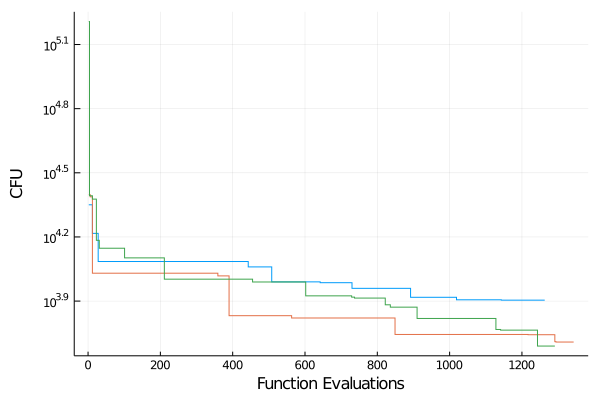

In [16]:
# Note that none of the curves are at convergence due to the low time allowed for the optimisation. 
CC1 = load(string(mle_def["savepath"], "\\Plot_MLEConvergence_",mle_def["flag"],".png"))

And now let's check the simulations of al the runs against the real data


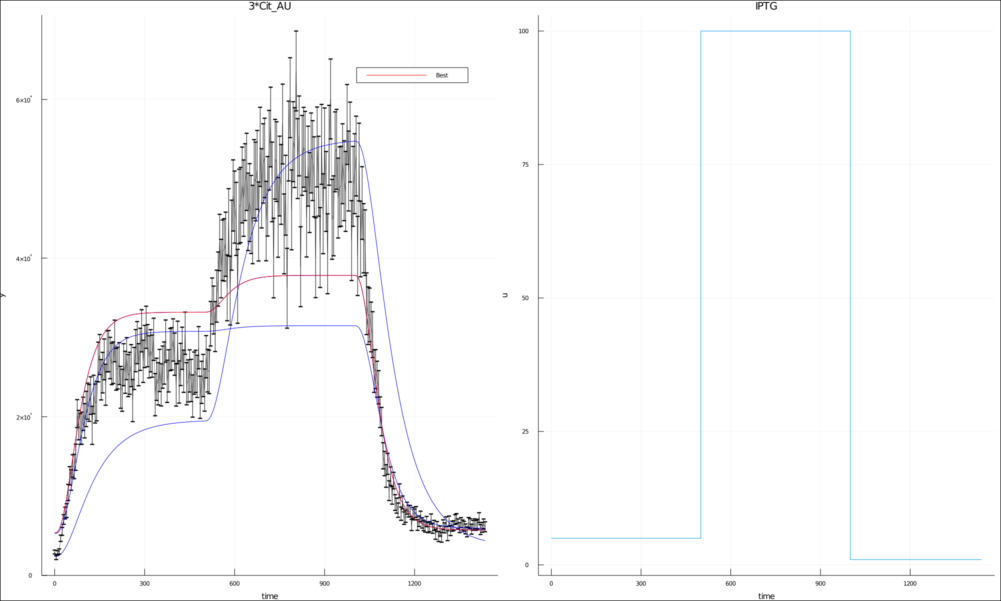

In [17]:
exp1 = load(string(mle_def["savepath"], "\\PlotMLEResults_Exp",1,"_",mle_def["flag"],".png"))

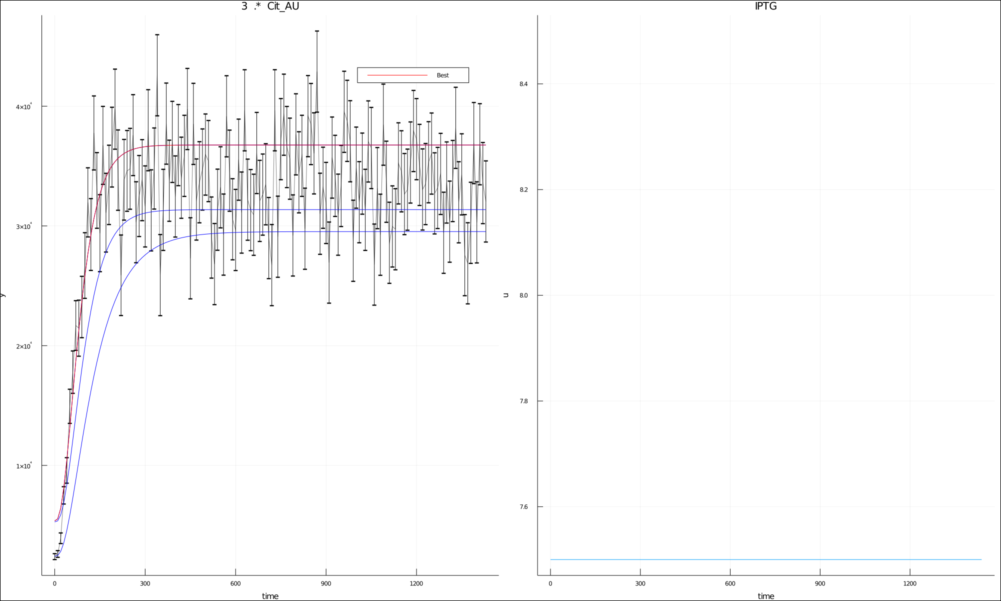

In [18]:
exp2 = load(string(mle_def["savepath"], "\\PlotMLEResults_Exp",2,"_",mle_def["flag"],".png"))

# MLE Example 2
#### This will be exactly the same example as before, but the 3 different runs will be optimised in parallel.

To do this it is as simple as typing true in the field parallel. However, this will only generate the necessary scripts but will not run them. Don't worry, I will show you what to do next. 


In [19]:
mle_def["parallel"] = [true]; 
mle_def["flag"] = ["Example2parallel"];

As before let's run the main script. In this case only the necessary scripts will be generated and you will need to do the rest, but do not worry, a message explaining what to do will be printed. 


In [20]:
mle_res2, model_def2, mle_def2 = MLEtheta(model_def, mle_def);


----------------------------------------- SCRIPTS -----------------------------------------
MLE scripts have been generated in the directory: 
         E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-08\MLEscripts\PLacExample_MLE.jl
--------------------------------------------------------------------------------------



        You have selected to run the optimisation in parallel. The necessary scripts have been generated,
        but you need to run the rest by yourself :(
        I am working on this, but for now let me show you what to do:

        Step 1:First you will need to include the generated script into your path (the one printed avobe ^).
            Remember that the start up time and memory usage of this will be really high!
            So, copy and paste this:
                include("E:\\UNI\\D_Drive\\PhD\\JULIAlang\\Generalisation_PLacExample\\Examples\\Results\\PLacExample_2021-01-08\\MLEscripts\\PLacExample_MLE.jl")

  

Be careful since the start-up time (and memory) for this is really high. It is only worth using it if you are going  to do a lot of runs with a lot of function evaluations in them (and you have a good machine). 

In [21]:
include("E:\\UNI\\D_Drive\\PhD\\JULIAlang\\Generalisation_PLacExample\\Examples\\Results\\PLacExample_2021-01-08\\MLEscripts\\PLacExample_MLE.jl")

RunMLEPLacExample (generic function with 1 method)

Now, the optimisation with the 3 runs in parallel. Note that in this case, the time shown is not 10 but a bit more. This is because of the start-up for some elements. If you run it a second time then it will take only 10 seconds. 


In [22]:
mle_res2 = RunMLEPLacExample(model_def2, mle_def2);

----------------------------------------- OPTIMISATION STARTS! -----------------------------------------
 16.065963 seconds (2.94 M allocations: 148.468 MiB, 0.11% gc time)
----------------------------------------- OPTIMISATION ENDED -----------------------------------------


See, parallel and quick!


In [23]:
mle_res2 = RunMLEPLacExample(model_def2, mle_def2);

----------------------------------------- OPTIMISATION STARTS! -----------------------------------------
 10.032980 seconds (49.67 k allocations: 1.187 MiB)
----------------------------------------- OPTIMISATION ENDED -----------------------------------------


The results will have the same exact structure, since the only thing that changed is the parallelisation of the optimisation, nothing else. 


In [24]:
mle_res2

Dict{Any,Any} with 5 entries:
  "StanDict"  => Dict{String,Any}[Dict("h1"=>2.29881,"Vm1"=>0.251784,"Km1"=>2.7…
  "Theta"     => [0.0271607 0.0204584 0.00792043; 0.251784 0.493872 0.295087; ……
  "convCurv"  => Any[Tuple{Int64,Real}[(2, 25506.1), (4, 12963.2), (6, 12963.2)…
  "BestTheta" => [0.0204584, 0.493872, 3.08116, 2.01728, 0.051916, 5.97606, 0.0…
  "BestCFV"   => [5250.22, 4889.97, 6106.75]

Now that we have the optimisation results in mle_res let's just save our results and plots (if selected) in the same form as in the series case using the function finsihMLEres


In [25]:
mle_res2, model_def2, mle_def2 = finishMLEres(mle_res2, model_def2, mle_def2);


----------------------------------------- RESULTS -----------------------------------------
MLE results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-08
Under the name PLacExample_2021-01-08_MLEresults_Example2parallel.jld
--------------------------------------------------------------------------------------


----------------------------------------- RESULTS -----------------------------------------
Simulation results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-08
Under the name PLacExample_2021-01-08_SimulationResults_MLEsimulations1.jld
--------------------------------------------------------------------------------------


----------------------------------------- RESULTS -----------------------------------------
Simulation results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\

Now let's have a look at all the plots generated as before!


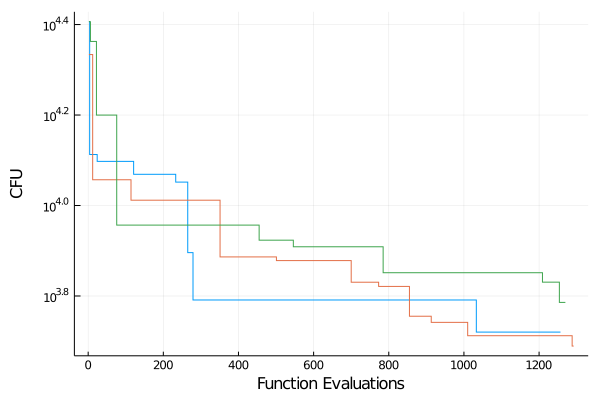

In [26]:
CC2 = load(string(mle_def2["savepath"], "\\Plot_MLEConvergence_",mle_def2["flag"],".png"))

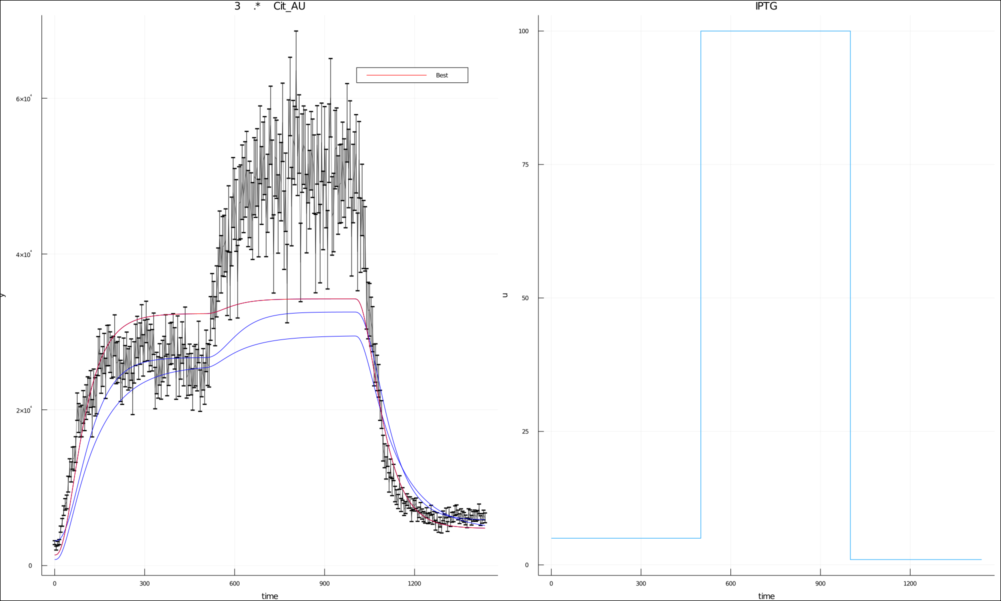

In [27]:
exp1p = load(string(mle_def2["savepath"], "\\PlotMLEResults_Exp",1,"_",mle_def2["flag"],".png"))

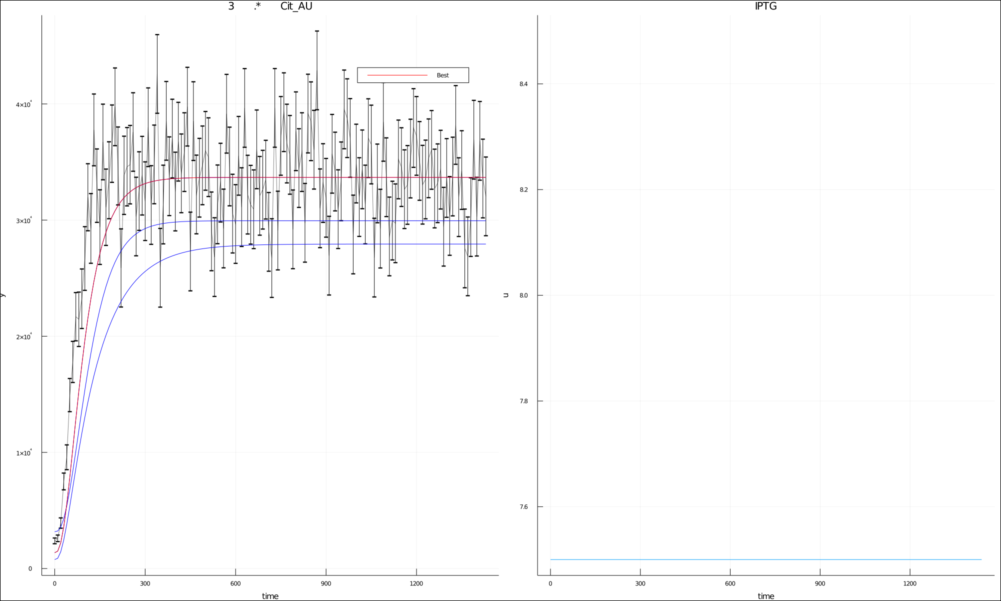

In [28]:
exp2p = load(string(mle_def2["savepath"], "\\PlotMLEResults_Exp",2,"_",mle_def2["flag"],".png"))

# MLE Example 3 --- EXTRA!
### Cross-Validation Option if validation ser of data is present

First, we need to give the details of the experiment, which in this case can be obtained using the function defCrossValMLEStruct


In [33]:
cvmle_def = defCrossValMLEStruct()

Dict{Any,Any} with 13 entries:
  "DataError" => Any[]
  "Nexp"      => Any[]
  "y0"        => Any[]
  "uInd"      => Any[]
  "theta"     => Any[]
  "Obs"       => Any[]
  "switchT"   => Any[]
  "preInd"    => Any[]
  "finalTime" => Any[]
  "tsamps"    => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "DataMean"  => Any[]

This is just an illustrative case, so we are going to use one of the same experiments used before for the fitting, but in a real scenario do not do this! <br>
Also, remember to give the theta vector/matrix to be assessed!

In [41]:
cvmle_def["Nexp"] = [1]; 
cvmle_def["finalTime"] = [1439];
cvmle_def["switchT"] = [[0, 500, 1000, 1439]]; 
cvmle_def["y0"] = [[10,10,10,10]]; 
cvmle_def["preInd"] = [[0]];
cvmle_def["uInd"] = [Array([5, 100, 1]')]; 

cvmle_def["tsamps"] = [collect(0:5:1439)];
cvmle_def["plot"] = [true]; 
cvmle_def["flag"] = ["CrossValMLEResults"]; 

cvmle_def["DataMean"] = ["PseudoDataFiles\\TestPLac_EXP1_Example1b_Observables.csv"]; 
cvmle_def["DataError"] = cvmle_def["DataMean"]; 

cvmle_def["Obs"] = ["3*Cit_AU"];

# !!!!! IMPORTANT !!!!!!
cvmle_def["theta"] = mle_res["Theta"]; 

And now let's just call the function that will simulate the model with the theta provided and assess which one is the best (in likelihood terms) according to the new data provided.


In [42]:
cvmle_res, model_def, cvmle_def = CrossValMLE(model_def, cvmle_def);


----------------------------------------- RESULTS -----------------------------------------
Simulation results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-07
Under the name PLacExample_2021-01-07_SimulationResults_MLEsimulations1.jld
--------------------------------------------------------------------------------------


----------------------------------------- RESULTS -----------------------------------------
Cross Validation of MLE results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-07
Under the name PLacExample_2021-01-07_MLEresults_CrossValMLEResults.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
Simulation PLOTS are saved in the directory: 
                 E

Now let's have a look at the contents of the result dictionary


In [43]:
cvmle_res

Dict{Any,Any} with 6 entries:
  "BestSimulations"    => [[2.01552 198.521 197.984 1973.73; 3.20931 210.468 19…
  "Costs"              => [3336.09; 3361.38; 3704.96]
  "BestSimObservables" => [[5921.18; 5933.83; … ; 6493.4; 6491.82]]
  "BestTheta"          => [0.0771748, 0.418721, 2.83068, 4.16478, 0.0382904, 4.…
  "SimObservables"     => Dict{Any,Any}("ExpObs_1"=>[5921.18; 5933.83; … ; 6493…
  "Simulations"        => Dict{Any,Any}("Exp_1"=>[2.01552 198.521 197.984 1973.…

- **BestSimulations:** Contains the simulation only for the best theta identified


In [44]:
cvmle_res["BestSimulations"]

1-element Array{Array{Float64,2},1}:
 [2.015515648727292 198.5210080237082 197.98367943908514 1973.7282283269944; 3.2093096065856663 210.4683416553255 198.40661324880057 1977.9445172721955; … ; 2.2049161329515736 217.17686255324847 217.11653750257244 2164.4664859221157; 2.2049160005957353 217.17674862494383 217.06358265878671 2163.9385713470224]

- **Costs:** Contains the value of the cost function (-loglikelihood) for all the thetas


In [45]:
cvmle_res["Costs"]

3×1 Array{Float64,2}:
 3336.0929707962114
 3361.37829613021
 3704.9622863050486

- **BestSimObservables:** Contains the simulation for the observables of the model only for the best theta


In [46]:
cvmle_res["BestSimObservables"]

1-element Array{Array{Float64,2},1}:
 [5921.184684980984; 5933.833551816587; … ; 6493.399457766347; 6491.815714041068]

- **BestTheta:** Contains the best theta identified in the process


In [23]:
cvmle_res["BestTheta"]

9-element Array{Float64,1}:
 0.07717484271672864
 0.4187213378521919
 2.8306814396224382
 4.164782034867695
 0.03829037138236119
 4.161931704148149
 0.021155962952977656
 0.02109870098487147
 9.969146113047483

- **SimObservables:** Simulation of the experiments only for the model observables for all the thetas given


In [24]:
cvmle_res["SimObservables"]

Dict{Any,Any} with 1 entry:
  "ExpObs_1" => [5921.18; 5933.83; … ; 6493.4; 6491.82]…

- **Simulations:** Simulation of the experiments for all the thetas given


In [47]:
cvmle_res["Simulations"]

Dict{Any,Any} with 1 entry:
  "Exp_1" => [2.01552 198.521 197.984 1973.73; 3.20931 210.468 198.407 1977.94;…

And let's check the plots to see our winner! (the red one)

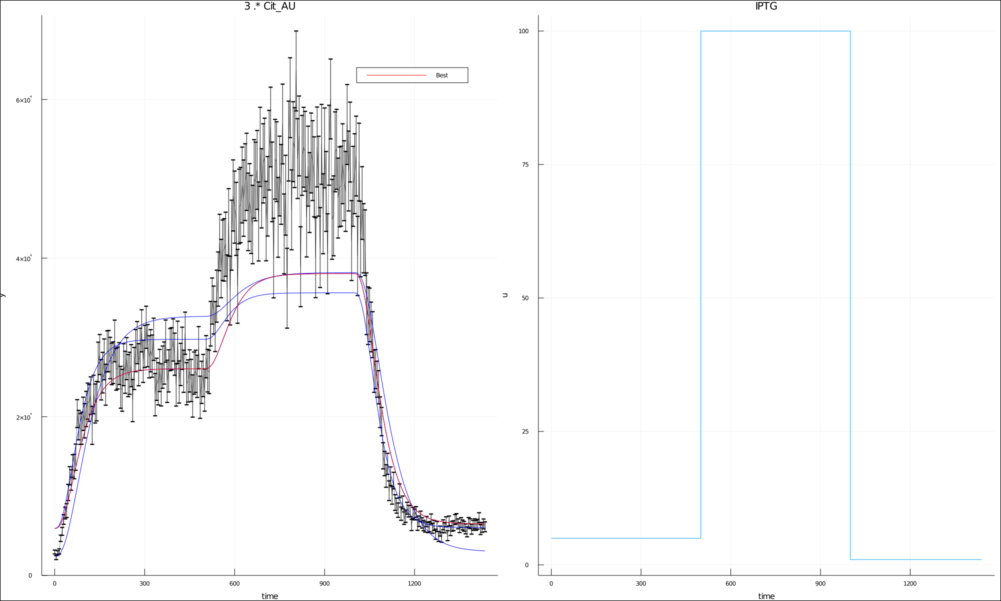

In [49]:
exp1cv = load(string(cvmle_def["savepath"], "\\PlotCrossValMLEResults_Exp",1,"_",cvmle_def["flag"],".png"))

### This is the end of the section. Look at the cool logo to check the package version ;) 


In [2]:
versionBOMBS()


                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  